In [152]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [153]:
# Dataset
dados_vendas = {
    'mes': ['Janeiro', 'Fevereiro', 'Março', 'Abril', 'Maio', 'Junho', 'Julho', 'Agosto', 'Setembro', 'Outubro', 'Novembro', 'Dezembro'],
    'vendas': [2000, 2200, 2300, 2500, 2600, 2700, 2800, 2900, 3000, 3100, 3200, 3300]
}

In [154]:
# Criar dataframe
df_vendas = pd.DataFrame.from_dict(dados_vendas)

In [155]:
# Numero do mes
df_vendas['nro_mes'] = [1,2,3,4,5,6,7,8,9,10,11,12]

In [156]:
df_vendas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   mes      12 non-null     object
 1   vendas   12 non-null     int64 
 2   nro_mes  12 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 416.0+ bytes


array([[<Axes: title={'center': 'vendas'}>,
        <Axes: title={'center': 'nro_mes'}>]], dtype=object)

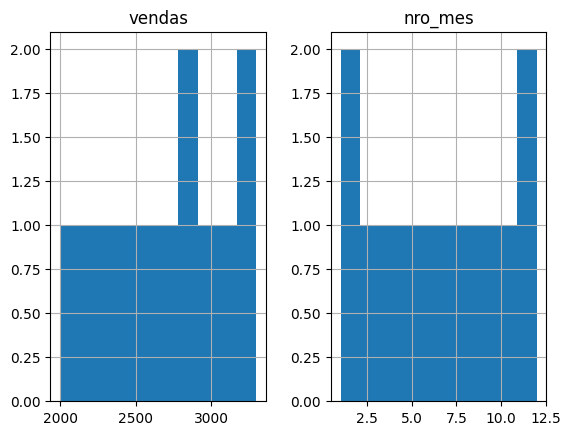

In [157]:
# Histograma
df_vendas.hist()

In [158]:
# Definir X e y
X = pd.DataFrame(df_vendas['nro_mes'])
y = df_vendas['vendas']

In [159]:
# Dividir conjunto entre treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

In [160]:
X_train

,nro_mes
8,9
5,6
2,3
1,2
11,12
4,5
7,8
3,4
6,7


In [161]:
# Treinar o modelo
model_vendas = LinearRegression().fit(X_train, y_train)

In [162]:
y_pred = model_vendas.predict(X_test)

In [163]:
# Dezembro predict
# Predict precisa receber uma matrix, por isso uma lista dentro da outra, isso faz com que ele entenda como matrix
previsao_dezembro = model_vendas.predict([[12]])
print(round(previsao_dezembro[0],2))

3331.84


/home/dennis/.local/share/virtualenvs/modelo_diabetes-Y-TSHu27/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [164]:
# reta = ax + b
## Coeficiente 'a' do modelo
model_vendas.coef_

array([109.3575419])

In [165]:
# Coeficiente 'b'
model_vendas.intercept_

np.float64(2019.5530726256984)

In [169]:
# Score = o quanto x explica o y
r2_score(y_test, y_pred)

0.9804933170681456

In [170]:
mean_squared_error(y_test, y_pred)

np.float64(5765.308510970324)

In [171]:
# residuo
mean_absolute_error(y_test, y_pred)

np.float64(54.84171322160122)

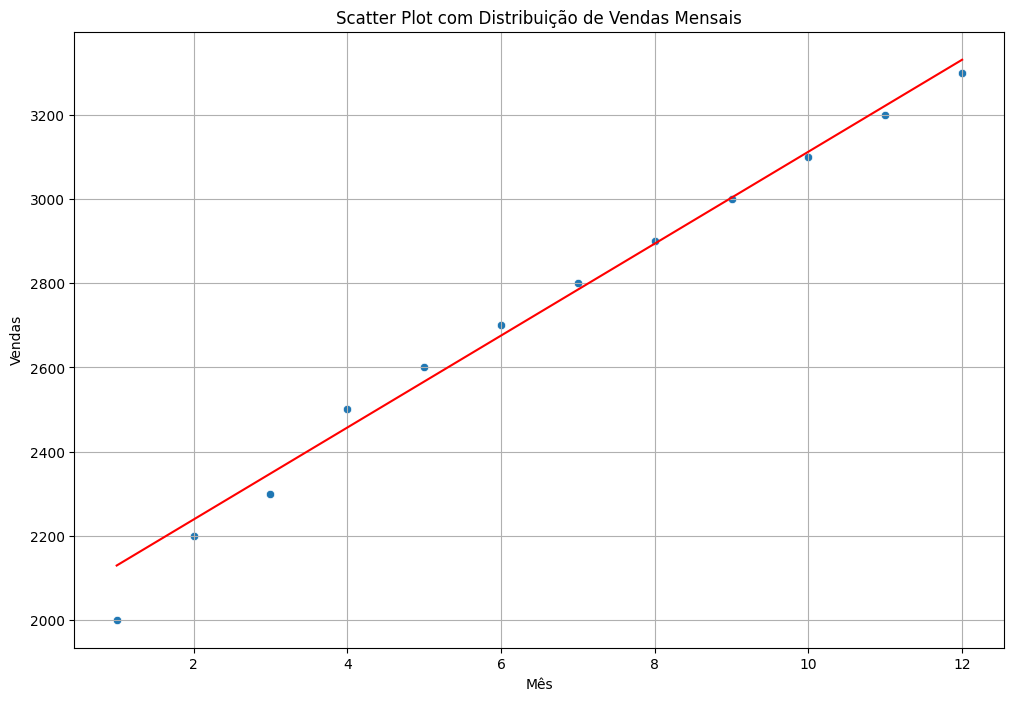

In [168]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='nro_mes', y='vendas', data=df_vendas)
plt.plot(df_vendas['nro_mes'], model_vendas.predict(df_vendas[['nro_mes']]), color='red')
plt.title('Scatter Plot com Distribuição de Vendas Mensais')
plt.xlabel('Mês')
plt.ylabel('Vendas')
plt.grid(True)
plt.show()